# Importazione Librerie

In [3]:
import pandas as pd
import matplotlib as plm
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors as mcolors
import seaborn as sns
import numpy as np
from numpy import median
from seaborn import JointGrid

# Cleaning e manipolazione dataset

Leggo il dataset

In [4]:
df = pd.read_csv('compitino_dataviz_2021_2022.csv')

Divido righe MentalScore e PhisicalScore

In [5]:
physical = df[df['nome_modulistica'] == 'SF12 PhysicalScore'].reset_index()
physical = physical.rename(columns = {'score_preop':'physical_score_preop', 'score_postop':'physical_score_postop'})
mental = df[df['nome_modulistica'] == 'SF12 MentalScore'].reset_index()
mental = mental.rename(columns = {'score_preop':'mental_score_preop', 'score_postop':'mental_score_postop'})

Unisco in un'unico dataset, generando degli attributi relativi al singolo score

In [6]:
df1 = pd.concat([physical, mental[['mental_score_preop', 'mental_score_postop']]], axis = 1)
df1.drop('index', axis = 1, inplace = True)
df1.drop('nome_modulistica', axis = 1, inplace = True)
columns_names = ['physical_score_preop',
 'physical_score_postop', 
 'mental_score_preop',
 'mental_score_postop',
 'condizioni_meteo',
 'sesso',
 'anni_ricovero',
 'temperatura_media',
 'umidita_media',
 'HI > 27',
 'natural_light']
df1 = df1.reindex(columns=columns_names)

Genero due nuove colonne contenti le differenze tra gli score post e pre operazione

In [7]:
physical_score_diff = df1['physical_score_postop'] - df1['physical_score_preop']
mental_score_diff = df1['mental_score_postop'] - df1['mental_score_preop']
df1.insert(2,"physical_score_diff", physical_score_diff)
df1.insert(5,"mental_score_diff", mental_score_diff)

Converto le colonne delle variabili categoriche da stringhe a fattori

In [8]:
df1['condizioni_meteo'] = df1['condizioni_meteo'].astype("category")
df1['sesso'] = df1['sesso'].astype("category")

Aggiunta differenze physical-mental

In [9]:
physical_mental_diff_postop = df1['physical_score_postop'] - df1['mental_score_postop']
physical_mental_diff_preop = df1['physical_score_preop'] - df1['mental_score_preop']
df1.insert(6,"physical_mental_diff_postop", physical_mental_diff_postop)
df1.insert(7,"physical_mental_diff_preop", physical_mental_diff_preop)
mental_physical_diff_postop = df1['mental_score_postop'] - df1['physical_score_postop'] 
mental_physical_diff_preop = df1['mental_score_preop'] - df1['physical_score_preop']
df1.insert(8,"mental_physical_diff_postop", mental_physical_diff_postop)
df1.insert(9,"mental_physical_diff_preop", mental_physical_diff_preop)

#### Splitting del dataset

In [10]:
mental_score_dataset = df[df['nome_modulistica'] == 'SF12 MentalScore']
physical_score_dataset = df[df['nome_modulistica'] == 'SF12 PhysicalScore']

Drop colonna nome_modulistica

In [11]:
mental_score_dataset.drop('nome_modulistica', axis = 1, inplace = True)
physical_score_dataset.drop('nome_modulistica',  axis = 1, inplace = True)

C:\Users\Giorgio\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Aggiungo la colonna delle differenze

In [12]:
physical_score_dataset.insert(2,"score_diff", (physical_score_dataset['score_postop'] - physical_score_dataset['score_preop']).round(3))
mental_score_dataset.insert(2,"score_diff", (mental_score_dataset['score_postop'] - mental_score_dataset['score_preop']).round(3))

# Visualizzazioni

Controllo le `condizioni_meteo` che predentano più di 30 osservazioni

In [13]:
df1.groupby('condizioni_meteo').size()

condizioni_meteo
coperto                               5
nebbia                                7
nebbia al mattino                   151
neve                                  4
neve debole                           1
neve e schiarite                      4
nubi sparse                          35
pioggia                               7
pioggia debole                       47
pioggia e schiarite                 175
pioggia mista a neve e schiarite      1
poco nuvoloso                       334
sereno                              217
sole e caldo                         49
temporale e schiarite                18
dtype: int64

Provo a ridurre il numero di categorie tenendo solo quelle con numerosià maggiore di 30

In [16]:
condizioni_meteo_numerosità_sufficiente = ['nebbia al mattino', 'nubi sparse', 'pioggia debole', 'pioggia e schiarite', \
                                          'poco nuvoloso', 'sereno', 'sole e caldo']
df1_significativo = df1[df1['condizioni_meteo'].isin(condizioni_meteo_numerosità_sufficiente)]
df1_significativo["condizioni_meteo"] = df1_significativo["condizioni_meteo"].cat.remove_unused_categories()

<ipython-input-16-ed8356b34974>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_significativo["condizioni_meteo"] = df1_significativo["condizioni_meteo"].cat.remove_unused_categories()


<ipython-input-18-8a0d692e31d2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_significativo['bin'] = pd.cut(abs(df1_significativo['physical_score_postop']),bin,precision=0)


Text(0.122, 0.96, "Le condizioni metereologiche influenzano l'indice SF-12 Physical Score\npostoperatorio a tre mesi da un'operazione chirurgica ?")

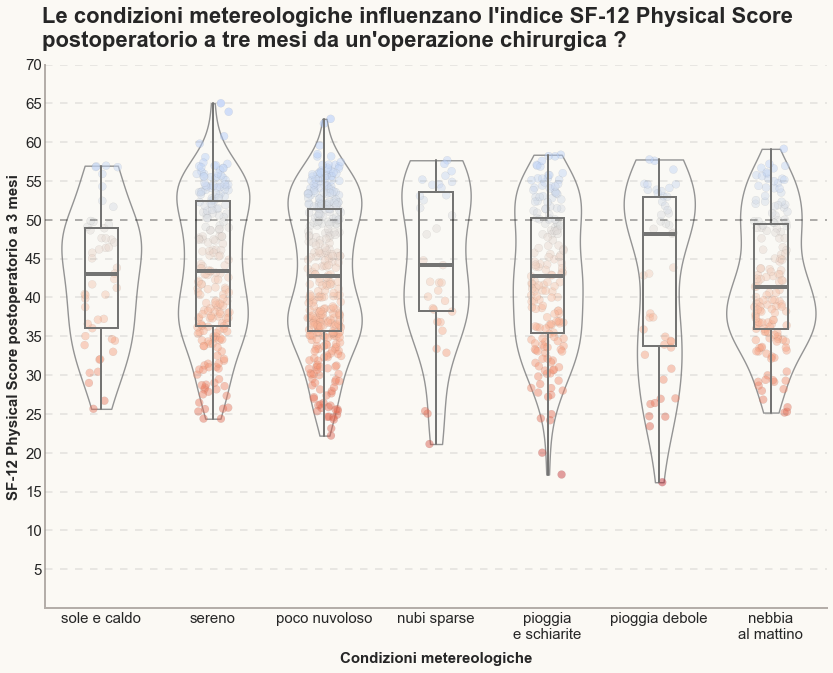

In [18]:
sns.set_style('white')
fig, ax = plt.subplots(figsize= (14, 10))
fig.patch.set_facecolor('#fbf9f4')
ax.set_facecolor('#fbf9f4')
#color_scale = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"]
color_scale = ["#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3"]
#linee_orizzontali = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
linee_orizzontali = list(range(5, 75, 5))
    
BOX_PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'#747473', 'zorder': 2, 'linewidth': 2},
    'whiskerprops':{'color':'#747473', 'linewidth':2},
    'medianprops':{'linewidth':'4', 'color':'#747473', 'solid_capstyle':'butt'},
    'meanprops':{"marker":"o","markerfacecolor":"#850e00", "markeredgecolor":"#850e00", 'zorder':3}
}

sns.violinplot(data=df1_significativo, x='condizioni_meteo', y='physical_score_postop',
                    order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
                    linewidth=1.4, \
                    inner = None, \
                    color = '#fbf9f4', \
                    scale = 'area', \
                    cut = 0, \
                    alpha = 1, \
                    zorder = 0,\
                    ax = ax)

# Color_Palette
bin = np.arange(15,85,1)
df1_significativo['bin'] = pd.cut(abs(df1_significativo['physical_score_postop']),bin,precision=0)

 
sns.boxplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo, \
            order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
            width = 0.3, \
            showcaps = False,\
            ax = ax,\
            #showmeans = True, \
            **BOX_PROPS)


sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo,
                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                      'nebbia al mattino'], 
                      hue = 'bin',
                      # Paletta divergente reversed
                      palette = "coolwarm_r", \
                      jitter = 0.15, \
                      alpha = 0.45, \
                      linewidth = 0.1, \
                      s = 8,
                      zorder = 1,
                      ax = ax)

plt.legend([],[], frameon=False)

# Linee in background 
for h in linee_orizzontali:
    if h == 50:
        ax.axhline(50, color='k', ls=(0, (5, 5)), alpha=0.4, zorder=6)
    else:
        ax.axhline(h, color='#7F7F7F', ls=(0, (5, 5)), alpha=0.2, zorder=5)
        

# Contorno grafico
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_color('#b4aea9')
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color('#b4aea9')
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_ylim(0,70)
ax.set_yticks(linee_orizzontali)
ax.set_yticklabels(linee_orizzontali, size=15)
y_label_ita = "SF-12 Physical Score postoperatorio a 3 mesi"
Y_label_eng = "SF12 Physical postoperative PROM score 3 months"
ax.set_ylabel(y_label_ita, size=15, weight="bold")
ax.set_xlabel("Condizioni metereologiche", size=15, weight="bold", labelpad = 10)
#x_labels (labelpad: spacing dall'asse)
xlabels = ['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia\ne schiarite', 'pioggia debole','nebbia\nal mattino']
ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")



# Titolo
titolo_italiano = "Le condizioni metereologiche influenzano l'indice SF-12 Physical Score\npostoperatorio a tre mesi da un'operazione chirurgica ?"
titolo_inglese = "Do weather conditions affect post-operatory physical PROM scores?"
fig.suptitle(
    titolo_italiano,
    x = 0.122,
    y = 0.96,
    ha="left",
    fontsize=22,
    weight="bold",
    wrap = True
)



# SALVATAGGIO
#fig.tight_layout()